Data shapes after flattening:
X_train_flat: (547, 2304), Y_train_flat: (547, 2304)
Shapes - X_train: (492, 2304), X_val: (55, 2304)
Validation Set Images


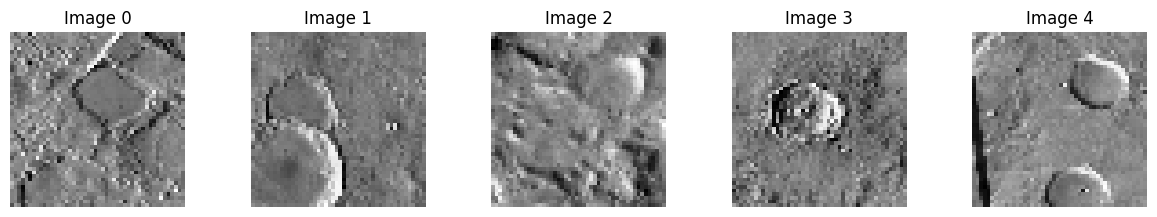

True Labels


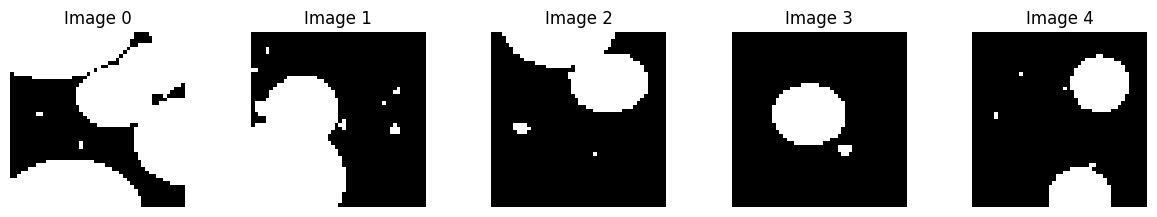

Predicted Labels


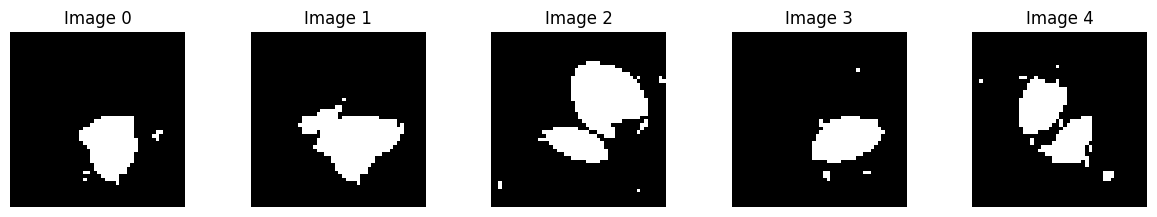

Balanced Accuracy: 0.5502157792115042
Confusion Matrix:
 [[83086  7223]
 [29842  6569]]


In [9]:
# %% [markdown]
# ## Task 1 - Part 1 (k-NN Version)

# %% [markdown]
# #### Step 1 − Import the necessary packages

# %%
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# %% [markdown]
# #### Step 1.5 − Picture Visualizer

# %%
# Function to visualize the images and their labels (predictions)
def img_view(dataset, labels=None, num_imgs=5, start_idx=0):
    num_imgs = min(num_imgs, len(dataset) - start_idx)
    plt.figure(figsize=(15, 5))
    for i in range(num_imgs):
        idx = start_idx + i
        plt.subplot(2, num_imgs, i + 1)
        plt.imshow(dataset[idx], cmap='gray')
        plt.axis('off')
        plt.title(f"Image {idx}")
        if labels is not None:
            plt.subplot(2, num_imgs, num_imgs + i + 1)
            plt.imshow(labels[idx], cmap='gray')
            plt.axis('off')
            plt.title(f"Prediction {idx}")
    plt.show()

# %% [markdown]
# #### Step 2 − Load and Reshape the Dataset for k-NN

# %%
# Load the data
X_train_b = np.load('Xtrain2_b.npy')
Y_train_b = np.load('Ytrain2_b.npy')
X_test_b = np.load('Xtest2_b.npy')

# Reshape the images to (48, 48) if they are not already in that shape
X_train_b = X_train_b.reshape(-1, 48, 48)
Y_train_b = Y_train_b.reshape(-1, 48, 48)
X_test_b = X_test_b.reshape(-1, 48, 48)

# Flatten each 48x48 image for k-NN
X_train_flat = X_train_b.reshape(len(X_train_b), 48 * 48)  # (num_samples, 2304)
Y_train_flat = Y_train_b.reshape(len(Y_train_b), 48 * 48)  # (num_samples, 2304)

print("Data shapes after flattening:")
print(f"X_train_flat: {X_train_flat.shape}, Y_train_flat: {Y_train_flat.shape}")

# %% [markdown]
# #### Step 3 − Train-Test Split and Standardization

# %%
# Split the dataset into training and validation sets
X_train_flat, X_val_flat, Y_train_flat, Y_val_flat = train_test_split(
    X_train_flat, Y_train_flat, test_size=0.1, random_state=42
)

# Standardize the data for k-NN
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

print(f"Shapes - X_train: {X_train_flat.shape}, X_val: {X_val_flat.shape}")

# Reshape `X_val_flat` and `Y_val_flat` back to 48x48 for visualization
X_val_b_reshaped = X_val_flat.reshape(-1, 48, 48)
Y_val_b_reshaped = Y_val_flat.reshape(-1, 48, 48)

# %% [markdown]
# #### Step 4 − Define and Train the k-NN Model

# %%
# Initialize the k-NN classifier
k = 5  # Choose k based on validation or experimentation
knn = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN model
knn.fit(X_train_flat, Y_train_flat)

# %% [markdown]
# #### Step 5 − Evaluate the Model on Validation Data

# %%
# Predict on validation data
val_predictions = knn.predict(X_val_flat)

# Reshape the predictions to the original 48x48 format for visualization
val_predictions_reshaped = val_predictions.reshape(-1, 48, 48)

# Visualize validation images and their true vs. predicted labels
print("Validation Set Images")
img_view(X_val_b_reshaped, num_imgs=5)
print("True Labels")
img_view(Y_val_b_reshaped, num_imgs=5)
print("Predicted Labels")
img_view(val_predictions_reshaped, num_imgs=5)

# %% [markdown]
# #### Step 6 − Evaluation Metrics

# %%
# Flatten the predictions and true labels for metric calculation
Y_val_flat = Y_val_flat.flatten()
val_predictions_flat = val_predictions.flatten()

# Compute balanced accuracy
balanced_acc = balanced_accuracy_score(Y_val_flat, val_predictions_flat)

# Confusion matrix
conf_matrix = confusion_matrix(Y_val_flat, val_predictions_flat)

# Output the results
print(f"Balanced Accuracy: {balanced_acc}")
print(f"Confusion Matrix:\n {conf_matrix}")
